# Performance of SPRITE on different dataset and imputation approaches

Analysis and plots associated with Fig. 2 and Fig. 3 of the manuscript. Evaluation of improvement in spatial gene expression prediction provided by SPRITE post-processing and specific ablation of Smooth and Reinforce steps.

The notebook requires data files generated by the ``impute.py`` script run on all benchmark datasets.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import scanpy as sc
from scipy.stats import pearsonr, spearmanr
import anndata as ad
import seaborn as sns
import pickle

from main import *
from downstream import *

In [2]:
# paths to results files (anndata)

filenames = ["scg_results/Dataset3_knn_spage_tangram.h5ad",
             "scg_results/Dataset9_knn_spage_tangram.h5ad",
             "scg_results/Dataset11_knn_spage_tangram.h5ad",
             "scg_results/Dataset12_knn_spage_tangram.h5ad",
             "scg_results/Dataset13_knn_spage_tangram.h5ad",
             "scg_results/Dataset14_knn_spage_tangram.h5ad",
             "scg_results/Dataset15_knn_spage_tangram.h5ad",
             "scg_results/Dataset17_knn_spage_tangram.h5ad",
             "scg_results/Axolotl_knn_spage_tangram.h5ad",
             "scg_results/Dataset7_knn_spage_tangram.h5ad",
             "scg_results/Dataset1_knn_spage_tangram.h5ad",
             ]

In [34]:
# dictionary for mapping keys to detailed labels

dataset_mapper = {"Dataset3": "Mouse Hipp.\n(seqFISH)",
                  "Dataset9": "Mouse VISP\n(MERFISH)",
                  "Dataset11": "Mouse PC\n(STARmap)", 
                  "Dataset12": "Human MTG\n(ISS)",
                  "Dataset13": "Mouse VISP\n(ISS)",
                  "Dataset14": "Drosophila Embryo\n(FISH)",
                  "Dataset15": "Mouse SC\n(osmFISH)",
                  "Dataset17": "Mouse VISP\n(ExSeq)",
                  "Axolotl": "Axolotl Brain\n(Stereo-seq)",
                  "Dataset7": "Human U2OS\n(MERFISH)",
                  "Dataset1": "Mouse Gast.\n(seqFISH)"}

method_mapper = {"tangram": "Tangram",
                 "spage": "SpaGE",
                 "knn": "Harmony"}

### Calculate performance improvement over baseline

In [6]:
models_list = ["Harmony-kNN","SpaGE","Tangram"]
pp_methods_list = ["S only", "R.gene only", "R.gene + S"]

comb_df = pd.DataFrame([])

for fn in filenames:
    
    # read, process, filter df
    if os.path.isfile(fn):
        adata = sc.read_h5ad(fn)
    else:
        adata = large_load(fn.split(".h5ad")[0])
    
    
    df = get_metrics(adata)
    df['log MAE'] = np.log(df['MAE'])
    df = df[df["Postprocessing"].isin(["Baseline","S only","R.gene only","R.gene + S"])]
    
    # get paired improvements
    df_paired = get_performance_over_baseline(df, models_list, pp_methods_list,
                                             use_log_mae=True) # log MAE
    
    # print improvements
    for model in np.unique(df_paired["Model"]):
        print("----------------------------------------\n")
        print(model)
        for pp in ["R.gene only", "R.gene + S"]:
            print("")
            print(pp)
            print(np.nanmedian(df_paired[(df_paired["Model"]==model)&(df_paired["Postprocessing"]==pp)]["Improvement in PCC"]))
            print(np.nanmedian(df_paired[(df_paired["Model"]==model)&(df_paired["Postprocessing"]==pp)]["Improvement in MAE"]))
            
    # concat df
    df_paired["Dataset"] = fn.split("/")[1].split("_")[0]
    comb_df = pd.concat((comb_df,df_paired))

----------------------------------------

Harmony-kNN

R.gene only
0.696250670345746
0.8580383656566513

R.gene + S
0.6961186243275103
0.8576238897331139
----------------------------------------

SpaGE

R.gene only
0.26070226407004904
0.8703387875609769

R.gene + S
0.2607047156759291
0.8702148929884761
----------------------------------------

Tangram

R.gene only
0.007805694456624601
0.8655018549478182

R.gene + S
0.007833551952703521
0.8646851768069703
----------------------------------------

Harmony-kNN

R.gene only
0.004552277009597733
-0.002943922609435101

R.gene + S
0.030528789191157358
0.007143824118046538
----------------------------------------

SpaGE

R.gene only
0.005554642282352196
-0.008452952715935436

R.gene + S
0.02380563147483604
-0.000795852806845021
----------------------------------------

Tangram

R.gene only
-0.09464480861175277
0.1848520098494526

R.gene + S
-0.07710953675989721
0.2947951360240717
----------------------------------------

Harmony-kNN

R.gene on

/home/edsun/anaconda3/envs/geneimputation/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4427: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/home/edsun/anaconda3/envs/geneimputation/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


----------------------------------------

Harmony-kNN

R.gene only
-0.0015750350766082256
0.10271562897054376

R.gene + S
0.004230695096485125
0.12671449594580686
----------------------------------------

SpaGE

R.gene only
-0.01647546283950536
0.3746539022404672

R.gene + S
0.001347585398709581
0.624527304119944
----------------------------------------

Tangram

R.gene only
-0.04412715099339973
0.5611822612518326

R.gene + S
-0.042054770816519746
0.7209503012395932


/home/edsun/anaconda3/envs/geneimputation/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4427: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/home/edsun/anaconda3/envs/geneimputation/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


----------------------------------------

Harmony-kNN

R.gene only
0.0
-0.005902726174999953

R.gene + S
0.002765521138181612
0.013086353580936842
----------------------------------------

SpaGE

R.gene only
-0.012760469467961916
0.295632321709656

R.gene + S
0.0015232657538892603
0.7437340343346848
----------------------------------------

Tangram

R.gene only
-0.031050034421488636
0.7594994548259206

R.gene + S
-0.022797267840500735
1.072249826194913
----------------------------------------

Harmony-kNN

R.gene only
-0.009147213416565714
0.08770468332587156

R.gene + S
0.025167282983127925
0.1652086933152416
----------------------------------------

SpaGE

R.gene only
-0.004850790303888408
0.16793781478941724

R.gene + S
0.006710059522881451
0.19977632754275526
----------------------------------------

Tangram

R.gene only
0.018659333348294616
0.019466580035309877

R.gene + S
0.02691283843659778
0.016256728617964955
----------------------------------------

Harmony-kNN

R.gene only
0

/home/edsun/anaconda3/envs/geneimputation/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4427: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/home/edsun/anaconda3/envs/geneimputation/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


----------------------------------------

Harmony-kNN

R.gene only
0.43161496839072905
0.16015934813863808

R.gene + S
0.43171921023502724
0.16015346451370105
----------------------------------------

SpaGE

R.gene only
0.1407318888507184
0.17127651931511512

R.gene + S
0.14063644898959538
0.171267279243414
----------------------------------------

Tangram

R.gene only
-0.00300070013630388
0.09809015144662547

R.gene + S
-0.003035202860252273
0.09808007022941645
----------------------------------------

Harmony-kNN

R.gene only
0.006757922095813065
-0.0015100225088890973

R.gene + S
0.016210123715465624
-0.0010917388460292
----------------------------------------

SpaGE

R.gene only
0.009612746170954534
-0.001185364505080555

R.gene + S
0.03467130776355043
-0.003982347768189731
----------------------------------------

Tangram

R.gene only
0.00024196358330397238
-0.0030965088801171436

R.gene + S
0.0016712774662902552
-0.004749264940438813


In [7]:
# # save df
# comb_df.to_csv("results/comb_df.csv")

## Figure 2AB: SPRITE improvements over baseline

In [3]:
# load df
comb_df = pd.read_csv("results/comb_df.csv")

/tmp/ipykernel_3709/3776935877.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comb_df_sprite["Dataset"] = [dataset_mapper[d] for d in comb_df_sprite["Dataset"]]


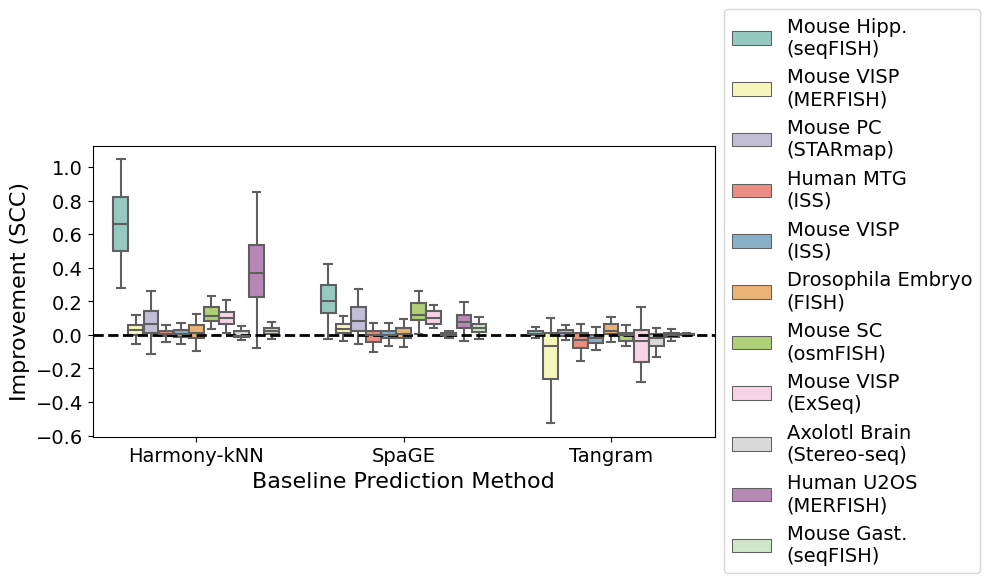

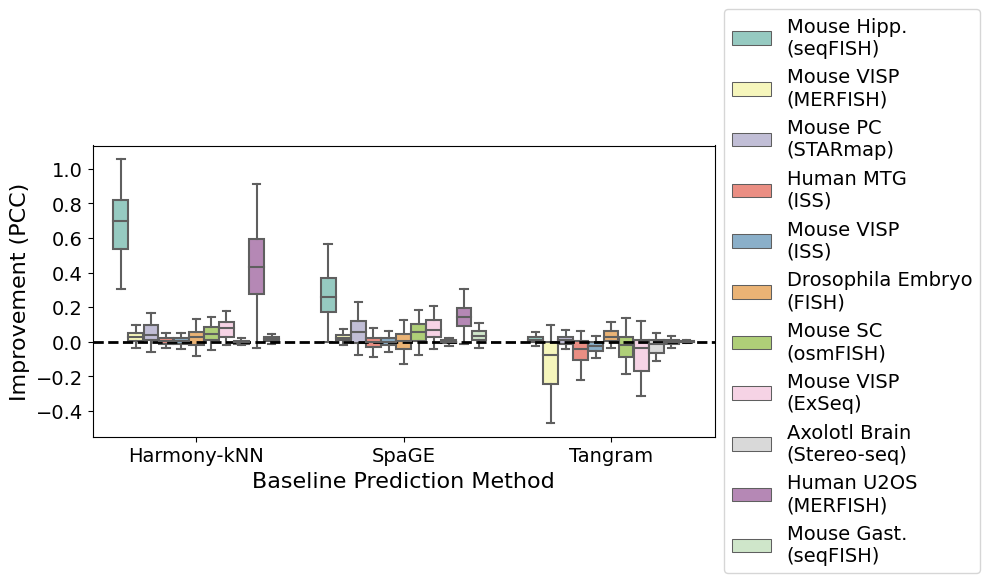

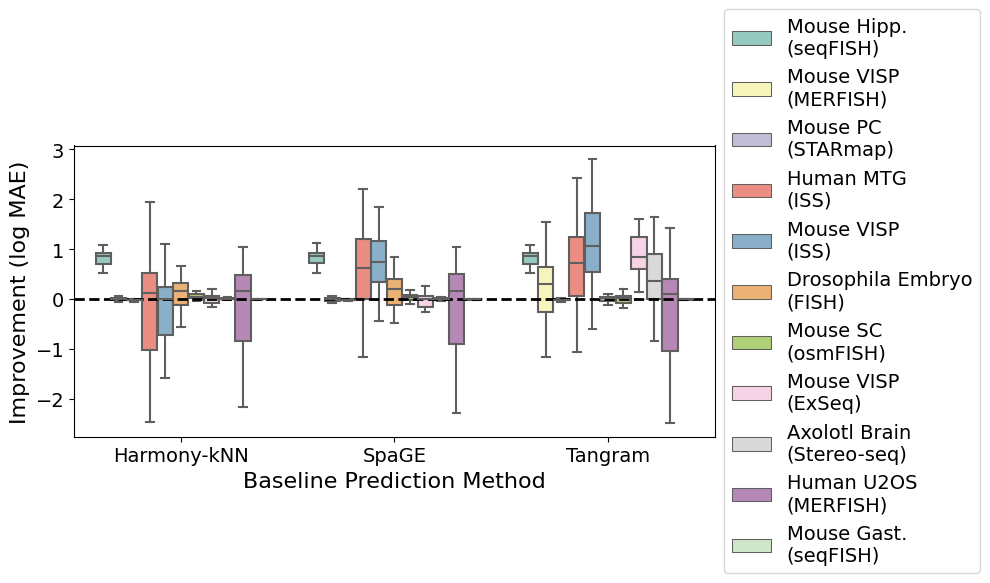

In [53]:
comb_df_sprite = comb_df[comb_df["Postprocessing"]=="R.gene + S"]
comb_df_sprite["Dataset"] = [dataset_mapper[d] for d in comb_df_sprite["Dataset"]]

plt.figure(figsize=(10,5))
sns.boxplot(data=comb_df_sprite, x="Model", y="Improvement in SCC", hue="Dataset",
           showfliers=False, whis=1, palette="Set3")
plt.axhline(0.0, color="k", linestyle="--", linewidth=2.0)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
plt.xlabel("Baseline Prediction Method", fontsize=16)
plt.ylabel("Improvement (SCC)", fontsize=16)
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig('plots/sprite_improvements/final_scc_improvement_grouped.pdf', bbox_inches='tight')
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(data=comb_df_sprite, x="Model", y="Improvement in PCC", hue="Dataset",
           showfliers=False, whis=1, palette="Set3")
plt.axhline(0.0, color="k", linestyle="--", linewidth=2.0)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
plt.xlabel("Baseline Prediction Method", fontsize=16)
plt.ylabel("Improvement (PCC)", fontsize=16)
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig('plots/sprite_improvements/final_pcc_improvement_grouped.pdf', bbox_inches='tight')
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(data=comb_df_sprite, x="Model", y="Improvement in MAE", hue="Dataset",
           showfliers=False, whis=1, palette="Set3")
plt.axhline(0.0, color="k", linestyle="--", linewidth=2.0)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
plt.xlabel("Baseline Prediction Method", fontsize=16)
plt.ylabel("Improvement (log MAE)", fontsize=16)
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig('plots/sprite_improvements/final_mae_improvement_grouped.pdf', bbox_inches='tight')
plt.show()

## Figure 2C: Breakdown of improvements by gene

In [4]:
# load df
comb_df = pd.read_csv("results/comb_df.csv")

In [11]:
comb_df_sprite = comb_df[comb_df["Postprocessing"]=="R.gene + S"]

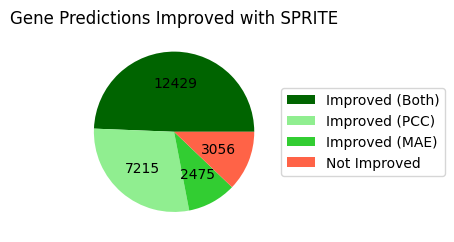

In [52]:
labels = ['Improved (Both)','Improved (PCC)','Improved (MAE)','Not Improved']
sizes = [0,0,0,0]

for i in range(comb_df_sprite.shape[0]):
    if ((comb_df_sprite['Improvement in PCC'].iloc[i]>=0)&(comb_df_sprite['Improvement in MAE'].iloc[i]>=0)):
        sizes[0] += 1
    elif ((comb_df_sprite['Improvement in PCC'].iloc[i]>=0)&(comb_df_sprite['Improvement in MAE'].iloc[i]<0)):
        sizes[1] += 1
    elif ((comb_df_sprite['Improvement in PCC'].iloc[i]<0)&(comb_df_sprite['Improvement in MAE'].iloc[i]>=0)):
        sizes[2] += 1
    elif ((comb_df_sprite['Improvement in PCC'].iloc[i]<0)&(comb_df_sprite['Improvement in MAE'].iloc[i]<0)):
        sizes[3] += 1

def absolute_value(val):
    a  = int(val/100.*np.array(sizes).sum())
    return a
        
fig, ax = plt.subplots(figsize=(4,4))
ax.pie(sizes, labels=labels, labeldistance=None, autopct=absolute_value, colors=['darkgreen','lightgreen','limegreen','tomato'])
plt.title("Gene Predictions Improved with SPRITE", fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)
plt.tight_layout()
plt.savefig('plots/sprite_improvements/piechart_genes.pdf', bbox_inches='tight')
plt.show()

/tmp/ipykernel_3709/3843835090.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  comb_df_sprite_grouped = comb_df_sprite.groupby(['Model',"Dataset"], as_index=False).median()


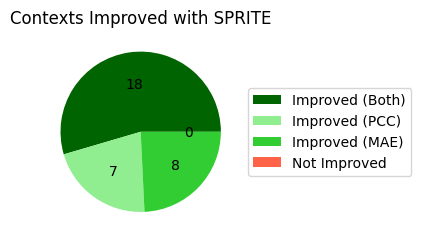

In [49]:
comb_df_sprite_grouped = comb_df_sprite.groupby(['Model',"Dataset"], as_index=False).median()

labels = ['Improved (Both)','Improved (PCC)','Improved (MAE)','Not Improved']
sizes = [0,0,0,0]

for i in range(comb_df_sprite_grouped.shape[0]):
    if ((comb_df_sprite_grouped['Improvement in PCC'].iloc[i]>=0)&(comb_df_sprite_grouped['Improvement in MAE'].iloc[i]>=0)):
        sizes[0] += 1
    elif ((comb_df_sprite_grouped['Improvement in PCC'].iloc[i]>=0)&(comb_df_sprite_grouped['Improvement in MAE'].iloc[i]<0)):
        sizes[1] += 1
    elif ((comb_df_sprite_grouped['Improvement in PCC'].iloc[i]<0)&(comb_df_sprite_grouped['Improvement in MAE'].iloc[i]>=0)):
        sizes[2] += 1
    elif ((comb_df_sprite_grouped['Improvement in PCC'].iloc[i]<0)&(comb_df_sprite_grouped['Improvement in MAE'].iloc[i]<0)):
        sizes[3] += 1

def absolute_value(val):
    a  = int(val/100.*np.array(sizes).sum())
    return a
        
fig, ax = plt.subplots(figsize=(4,4))
ax.pie(sizes, labels=labels, labeldistance=None, autopct=absolute_value, colors=['darkgreen','lightgreen','limegreen','tomato'])
plt.title("Contexts Improved with SPRITE", fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)
plt.tight_layout()
plt.savefig('plots/sprite_improvements/piechart_data.pdf', bbox_inches='tight')
plt.show()

## Figure 2DE: Spatial visualization of improvements

In [22]:
dataset_mapper = {"Dataset3": "Mouse Hipp (seqFISH)",
                  "Dataset9": "Mouse VISP (MERFISH)",
                  "Dataset11": "Mouse PC (STARmap)", 
                  "Dataset12": "Human MTG (ISS)",
                  "Dataset13": "Mouse VISP (ISS)",
                  "Dataset14": "Drosophila Embryo (FISH)",
                  "Dataset15": "Mouse SC (osmFISH)",
                  "Dataset17": "Mouse VISP (ExSeq)",}

/home/edsun/anaconda3/envs/geneimputation/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4427: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/home/edsun/anaconda3/envs/geneimputation/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/tmp/ipykernel_3709/3149915839.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


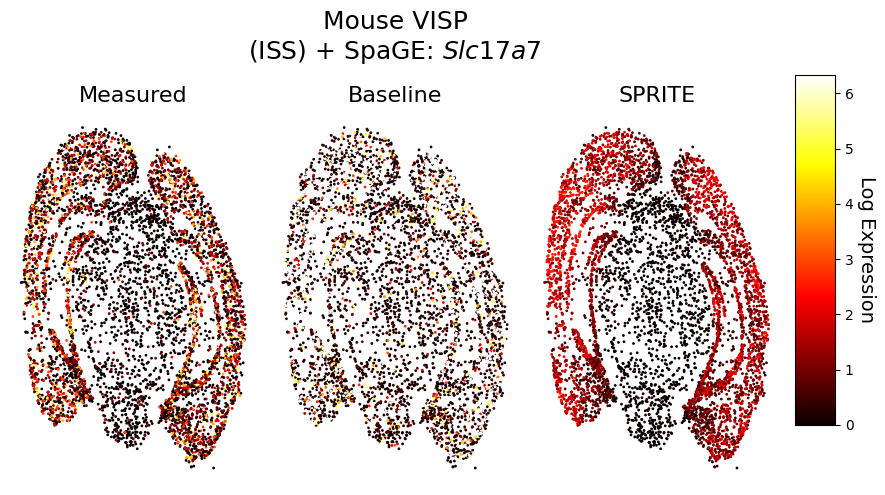

In [43]:
fn = "scg_results/Dataset13_knn_spage_tangram.h5ad"
model = "SpaGE"
best_gene = 'slc17a7'

####################################

models_list = ["Harmony-kNN","SpaGE","Tangram"]
pp_methods_list = ["R.gene + S"]

# read, process, filter df
adata = sc.read_h5ad(fn)
adata.obsm["spatial"][:,0] = -adata.obsm["spatial"][:,0]
adata.obsm["spatial"][:,1] = -adata.obsm["spatial"][:,1]
df = get_metrics(adata)
df = df[df["Postprocessing"].isin(["Baseline","R.gene + S"])]

# get paired improvements
df_paired = get_performance_over_baseline(df, models_list, pp_methods_list)

df_paired_sub = df_paired[df_paired["Model"] == model].copy()
df_paired_sub["PCC_rank"] = df_paired_sub["Improvement in PCC"].rank(method='dense', ascending=False)
df_paired_sub["MAE_rank"] = df_paired_sub["Improvement in MAE"].rank(method='dense', ascending=False)
# average rank
df_paired_sub['avg_rank'] = df_paired_sub[['PCC_rank', 'MAE_rank']].mean(axis=1)

if model == "Harmony-kNN":
    m = 'knn'
elif model == "SpaGE":
    m = 'spage'
elif model == "Tangram":
    m = 'tangram'
else:
    raise Exception("model not recognized")

# spatial plotting
i = np.where(adata.var_names == best_gene)[0]

# define consistent color map
all_vals = np.concatenate((adata.X[:,i].flatten(), adata.obsm[m+"_predicted_expression_raw"][best_gene].values, adata.obsm["smoothed_reinforced_gene_joint_"+m+"_predicted_expression_raw"][best_gene].values))
vmin = np.percentile(all_vals, 10)
vmax = np.percentile(all_vals, 90)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8,5))

ax1.axis('off')
cmap = adata.X[:,i]
cmap[cmap > np.percentile(cmap,99)] = np.percentile(cmap,99)
im = ax1.scatter(adata.obsm['spatial'][:,0],adata.obsm['spatial'][:,1],s=1,c=cmap,vmin=vmin,vmax=vmax,cmap='hot',rasterized=True)
ax1.set_title('Measured', fontsize = 16)
ax1.set_ylabel(best_gene)

ax2.axis('off')
cmap = adata.obsm[m+"_predicted_expression_raw"][best_gene]
cmap[cmap > np.percentile(cmap,99)] = np.percentile(cmap,99)
im = ax2.scatter(adata.obsm['spatial'][:,0],adata.obsm['spatial'][:,1],s=1,c=cmap,vmin=vmin,vmax=vmax,cmap='hot',rasterized=True)
ax2.set_title('Baseline', fontsize = 16)

ax3.axis('off')
cmap = adata.obsm["smoothed_reinforced_gene_joint_"+m+"_predicted_expression_raw"][best_gene]
cmap[cmap > np.percentile(cmap,99)] = np.percentile(cmap,99)
im = ax3.scatter(adata.obsm['spatial'][:,0],adata.obsm['spatial'][:,1],s=1,c=cmap,vmin=vmin,vmax=vmax,cmap='hot',rasterized=True)
ax3.set_title('SPRITE', fontsize = 16)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([1.0, 0.15, 0.05, 0.7])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.ax.get_yaxis().labelpad = 16
cbar.ax.set_ylabel('Log Expression', rotation=270, fontsize=14)

d= fn.split('.')[0].split('/')[1].split('_')[0]
plt.suptitle(f'{dataset_mapper[d]} + {model}:'+' $\it{Slc17a7}$', fontsize=18)

plt.tight_layout()
plt.savefig(f'plots/sprite_improvements/spatial_{d}_{model}_{best_gene}.pdf', bbox_inches='tight', dpi=500)
plt.show()

/tmp/ipykernel_3709/3730432776.py:71: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


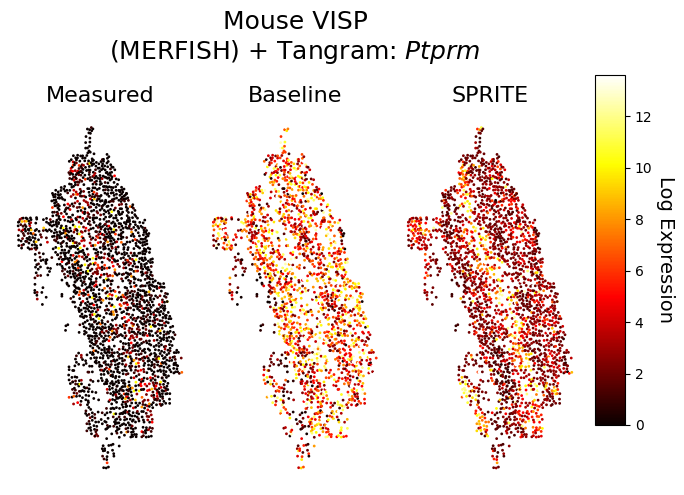

In [37]:
fn = "scg_results/Dataset9_knn_spage_tangram.h5ad"
model = "Tangram"
best_gene = 'ptprm'

####################################

models_list = ["Harmony-kNN","SpaGE","Tangram"]
pp_methods_list = ["R.gene + S"]

# read, process, filter df
adata = sc.read_h5ad(fn)
df = get_metrics(adata)
df = df[df["Postprocessing"].isin(["Baseline","R.gene + S"])]

# get paired improvements
df_paired = get_performance_over_baseline(df, models_list, pp_methods_list)

df_paired_sub = df_paired[df_paired["Model"] == model].copy()
df_paired_sub["PCC_rank"] = df_paired_sub["Improvement in PCC"].rank(method='dense', ascending=False)
df_paired_sub["MAE_rank"] = df_paired_sub["Improvement in MAE"].rank(method='dense', ascending=False)
# average rank
df_paired_sub['avg_rank'] = df_paired_sub[['PCC_rank', 'MAE_rank']].mean(axis=1)

if model == "Harmony-kNN":
    m = 'knn'
elif model == "SpaGE":
    m = 'spage'
elif model == "Tangram":
    m = 'tangram'
else:
    raise Exception("model not recognized")

# spatial plotting
i = np.where(adata.var_names == best_gene)[0]

# define consistent color map
all_vals = np.concatenate((adata.X[:,i].flatten(), adata.obsm[m+"_predicted_expression_raw"][best_gene].values, adata.obsm["smoothed_reinforced_gene_joint_"+m+"_predicted_expression_raw"][best_gene].values))
vmin = np.percentile(all_vals, 10)
vmax = np.percentile(all_vals, 90)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6,5))

ax1.axis('off')
cmap = adata.X[:,i]
cmap[cmap > np.percentile(cmap,99)] = np.percentile(cmap,99)
im = ax1.scatter(adata.obsm['spatial'][:,0],adata.obsm['spatial'][:,1],s=1,c=cmap,vmin=vmin,vmax=vmax,cmap='hot',rasterized=True)
ax1.set_title('Measured', fontsize = 16)
ax1.set_ylabel(best_gene)

ax2.axis('off')
cmap = adata.obsm[m+"_predicted_expression_raw"][best_gene]
cmap[cmap > np.percentile(cmap,99)] = np.percentile(cmap,99)
im = ax2.scatter(adata.obsm['spatial'][:,0],adata.obsm['spatial'][:,1],s=1,c=cmap,vmin=vmin,vmax=vmax,cmap='hot',rasterized=True)
ax2.set_title('Baseline', fontsize = 16)

ax3.axis('off')
cmap = adata.obsm["smoothed_reinforced_gene_joint_"+m+"_predicted_expression_raw"][best_gene]
cmap[cmap > np.percentile(cmap,99)] = np.percentile(cmap,99)
im = ax3.scatter(adata.obsm['spatial'][:,0],adata.obsm['spatial'][:,1],s=1,c=cmap,vmin=vmin,vmax=vmax,cmap='hot',rasterized=True)
ax3.set_title('SPRITE', fontsize = 16)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([1.0, 0.15, 0.05, 0.7])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.ax.get_yaxis().labelpad = 16
cbar.ax.set_ylabel('Log Expression', rotation=270, fontsize=14)

d= fn.split('.')[0].split('/')[1].split('_')[0]
plt.suptitle(f'{dataset_mapper[d]} + {model}:'+' $\it{Ptprm}$', fontsize=18)

plt.tight_layout()
plt.savefig(f'plots/sprite_improvements/spatial_{d}_{model}_{best_gene}.pdf', bbox_inches='tight', dpi=500)
plt.show()

## Figure 3: Ablation of Smooth/Reinforce

In [54]:
# load df
comb_df = pd.read_csv("results/comb_df.csv")

In [55]:
# average metrics by dataset and model
comb_df = comb_df.groupby(['Model', 'Postprocessing', "Dataset"], as_index=False).median()

/tmp/ipykernel_3709/318787179.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  comb_df = comb_df.groupby(['Model', 'Postprocessing', "Dataset"], as_index=False).median()


In [56]:
# map keys

map_dict = {
    "S only": "No Reinforce",
    "R.gene only": "No Smooth",
    "R.gene + S": "SPRITE",
}

comb_df["Postprocessing"] = [map_dict[x] for x in comb_df["Postprocessing"]]

In [59]:
plot_palette = {
    "No Reinforce": "cornflowerblue",
    "No Smooth": "lightpink",
    "SPRITE": "limegreen",
}

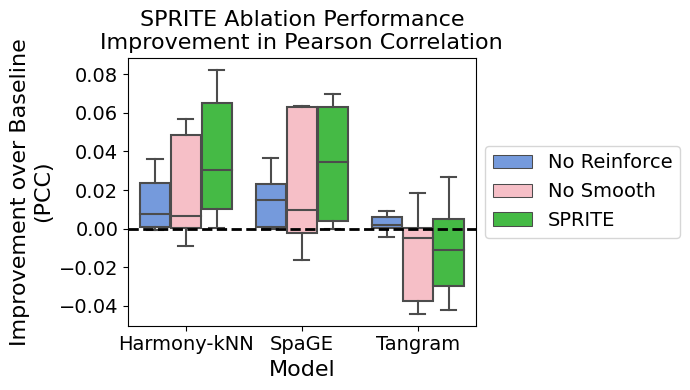

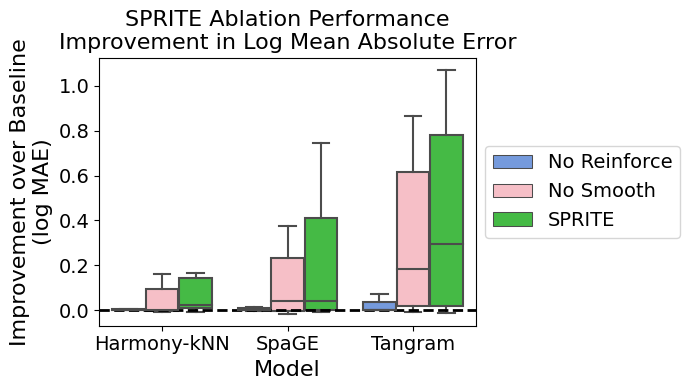

----------------------------------------

Harmony-kNN

No Reinforce
0.0076868975043833
0.0009022980423246

No Smooth
0.006757922095813
-0.001510022508889

SPRITE
0.0305287891911573
0.02051471749257755
----------------------------------------

SpaGE

No Reinforce
0.01497472931782955
-1.9269704498725563e-08

No Smooth
0.0096127461709545
0.03850001612036315

SPRITE
0.0346713077635504
0.040594173027675706
----------------------------------------

Tangram

No Reinforce
0.00186091537364045
-6.850056948004557e-06

No Smooth
-0.004993725216813
0.18485200984945255

SPRITE
-0.0112446132125341
0.2947951360240717


In [63]:
plt.figure(figsize=(7,4))
sns.boxplot(data=comb_df, x="Model", y="Improvement in PCC", hue="Postprocessing",
           showfliers=False, whis=1, palette=plot_palette, hue_order=["No Reinforce", "No Smooth", "SPRITE"])
plt.axhline(0.0, color="k", linestyle="--", linewidth=2.0)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
plt.title("SPRITE Ablation Performance\nImprovement in Pearson Correlation", fontsize=16)
plt.xlabel("Model", fontsize=16)
plt.ylabel("Improvement over Baseline\n(PCC)", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig('plots/sprite_ablation/ablation_pcc.pdf')
plt.show()

plt.figure(figsize=(7,4))
sns.boxplot(data=comb_df, x="Model", y="Improvement in MAE", hue="Postprocessing",
           showfliers=False, whis=1, palette=plot_palette, hue_order=["No Reinforce", "No Smooth", "SPRITE"])
plt.axhline(0.0, color="k", linestyle="--", linewidth=2.0)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
plt.title("SPRITE Ablation Performance\nImprovement in Log Mean Absolute Error", fontsize=16)
plt.xlabel("Model", fontsize=16)
plt.ylabel("Improvement over Baseline\n(log MAE)", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig('plots/sprite_ablation/ablation_mae.pdf')
plt.show()

# print improvements
for model in np.unique(comb_df["Model"]):
    print("----------------------------------------\n")
    print(model)
    for pp in ["No Reinforce", "No Smooth", "SPRITE"]:
        print("")
        print(pp)
        print(np.nanmedian(comb_df[(comb_df["Model"]==model)&(comb_df["Postprocessing"]==pp)]["Improvement in PCC"]))
        print(np.nanmedian(comb_df[(comb_df["Model"]==model)&(comb_df["Postprocessing"]==pp)]["Improvement in MAE"]))